In [32]:
import requests
import bs4
from bs4 import BeautifulSoup

In [ ]:
# 강아지 
import json
from pprint import pprint

base_url= 'https://www.pimfyvirus.com/dataurl_action/homeprotectionlist/p=/search/01/p={}//'
# print(type(base_url))


req_header = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest" #파일구조가 Json이라 필요 
}

dog_data_list = list()

for  i in range(1,186): #페이지 범위 
    url=base_url.format(i)
    #network에서 응답이 post로 처리하게 되어있음 
    res=requests.post(url,headers=req_header)

    

    if(res.ok):
        # print(res.url)
        data = res.json()
        
        for item in data.get('lst',[]):
            dog_data_dict = dict()
            
            link = item['wish']
            dog_id = link.strip('/').split('/')[-1]     
            tags=item['tag']  
            breed = item['info23']
            date = item['info2']
            t2 = item['t2']

            parts = t2.split("/")
            name = parts[0] 
            gender = parts[1] 
            weight = parts[2] 

            #dict 저장 
            dog_data_dict['ID']= dog_id
            dog_data_dict['tags']= tags
            dog_data_dict['이름']= name
            dog_data_dict['성별']= gender
            dog_data_dict['몸무게']= weight
            dog_data_dict['종']= breed
            dog_data_dict['공고날짜 ']= date
            
            dog_data_list.append(dog_data_dict)                 
    else:
        print(f'Error Code = {res.status_code}') 


print(len(dog_data_list))
pprint(dog_data_list) 

2220
[{'ID': '2982',
  'tags': ['임보가능', '긴급임보'],
  '공고날짜 ': '2025-08-03',
  '몸무게': '6kg',
  '성별': '여',
  '이름': '소이',
  '종': '믹스'},
 {'ID': '2981',
  'tags': ['임보가능', '일반임보'],
  '공고날짜 ': '2025-08-03',
  '몸무게': '6kg',
  '성별': '여',
  '이름': '크림이 ',
  '종': '믹스'},
 {'ID': '2980',
  'tags': ['임보가능', '일반임보'],
  '공고날짜 ': '2025-08-03',
  '몸무게': '9kg',
  '성별': '여',
  '이름': '깜비',
  '종': '믹스'},
 {'ID': '2979',
  'tags': ['임보가능', '긴급임보'],
  '공고날짜 ': '2025-08-03',
  '몸무게': '3kg',
  '성별': '남',
  '이름': '초코',
  '종': '품종'},
 {'ID': '2978',
  'tags': ['임보가능', '입양전제'],
  '공고날짜 ': '2025-08-02',
  '몸무게': '2kg',
  '성별': '여',
  '이름': '몽쉘',
  '종': '믹스'},
 {'ID': '2977',
  'tags': ['임보가능', '일반임보'],
  '공고날짜 ': '2025-08-02',
  '몸무게': '7kg',
  '성별': '남',
  '이름': '호두',
  '종': '믹스'},
 {'ID': '2976',
  'tags': ['임보가능', '일반임보'],
  '공고날짜 ': '2025-08-02',
  '몸무게': '7kg',
  '성별': '남',
  '이름': '루리',
  '종': '믹스'},
 {'ID': '2975',
  'tags': ['임보가능', '긴급임보'],
  '공고날짜 ': '2025-08-01',
  '몸무게': '7kg',
  '성별': '남',
  '이름': '서리',

In [34]:
import json 

with open('data/dog_data.json','w',encoding='utf-8') as file:
    json.dump(dog_data_list, file,ensure_ascii=False,indent=2)

In [35]:
import pandas as pd

dog_df = pd.read_json('data/dog_data.json')
print(type(dog_df))
dog_df

<class 'pandas.core.frame.DataFrame'>


,ID,tags,이름,성별,몸무게,종,공고날짜
0,2982,"[임보가능, 긴급임보]",소이,여,6kg,믹스,2025-08-03
1,2981,"[임보가능, 일반임보]",크림이,여,6kg,믹스,2025-08-03
2,2980,"[임보가능, 일반임보]",깜비,여,9kg,믹스,2025-08-03
3,2979,"[임보가능, 긴급임보]",초코,남,3kg,품종,2025-08-03
4,2978,"[임보가능, 입양전제]",몽쉘,여,2kg,믹스,2025-08-02
...,...,...,...,...,...,...,...
2215,123,[공고종료],로나,여,6kg,None,2024-02-21
2216,118,[공고종료],토토,남,5kg,None,2024-02-21
2217,111,[공고종료],연근,여,4kg,None,2024-02-21
2218,95,[공고종료],몽실,여,7kg,None,2024-02-20


### tag별 분석 

In [36]:
#explode 써서 tag list 분리 
dog_df.explode('tags')['tags'].value_counts()

tags
입양완료     820
공고종료     535
일반임보     475
임보가능     447
임보중      418
입양전제     164
단기임보      89
릴레이임보     82
긴급임보      54
수유임보       1
Name: count, dtype: int64

In [37]:
#apply() 리스트 순환 함수 
dog_df.loc[dog_df['tags'].apply(lambda x: '입양완료' not in x and '공고종료' not in x)].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,0,2982,"[임보가능, 긴급임보]",소이,여,6kg,믹스,2025-08-03
1,1,2981,"[임보가능, 일반임보]",크림이,여,6kg,믹스,2025-08-03
2,2,2980,"[임보가능, 일반임보]",깜비,여,9kg,믹스,2025-08-03
3,3,2979,"[임보가능, 긴급임보]",초코,남,3kg,품종,2025-08-03
4,4,2978,"[임보가능, 입양전제]",몽쉘,여,2kg,믹스,2025-08-02
...,...,...,...,...,...,...,...,...
860,1195,61,"[임보중, 일반임보]",누리,여,7kg,None,2024-02-16
861,1199,52,"[임보중, 일반임보]",써니,남,16kg,None,2024-02-15
862,1201,46,"[임보중, 일반임보]",보리,남,6kg,None,2024-02-15
863,1203,27,"[임보중, 일반임보]",새벽,여,7.2kg,None,2024-02-14


In [38]:
#apply() 리스트 순환 함수 
dog_df.loc[dog_df['tags'].apply(lambda x: '입양완료' in x )].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,1206,2939,[입양완료],베리,남,6kg,품종,2025-07-24
1,1207,2931,[입양완료],다솜,여,2kg,믹스,2025-07-22
2,1208,2904,[입양완료],도로시_모아,여,6kg,믹스,2025-07-18
3,1209,2857,[입양완료],댕잇슈-네즈,여,2kg,믹스,2025-07-10
4,1210,2829,[입양완료],사랑,여,1kg,품종,2025-07-08
...,...,...,...,...,...,...,...,...
815,2035,29,[입양완료],하추,여,10kg,None,2024-02-15
816,2036,25,[입양완료],하랑,남,11.6kg,None,2024-02-13
817,2037,23,[입양완료],두부,여,14.4kg,None,2024-02-13
818,2038,21,[입양완료],어독스 겸이,남,6kg,None,2024-02-13


In [39]:
dog_df.loc[dog_df['tags'].apply(lambda x: '공고종료' in x)].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,101,2872,[공고종료],동사세_열무,남,2kg,품종,2025-07-12
1,102,2871,[공고종료],동사세_에단,남,10kg,믹스,2025-07-12
2,103,2870,[공고종료],동사세_크로핀,여,11kg,믹스,2025-07-12
3,117,2854,[공고종료],동사세_나리,여,5kg,믹스,2025-07-10
4,137,2814,[공고종료],동사세_피트,남,15kg,믹스,2025-07-06
...,...,...,...,...,...,...,...,...
530,2215,123,[공고종료],로나,여,6kg,None,2024-02-21
531,2216,118,[공고종료],토토,남,5kg,None,2024-02-21
532,2217,111,[공고종료],연근,여,4kg,None,2024-02-21
533,2218,95,[공고종료],몽실,여,7kg,None,2024-02-20


In [40]:
dog_df['성별'].value_counts()

성별
여              1145
남              1073
푸들                1
사례비 월20] 늘이       1
Name: count, dtype: int64

In [ ]:
import numpy as np


# 성별 아닌 값 NaN 처리 및 dropna 
def clean_gender(val):
    if val in ['여', '남']:
        return val
    else:
        return np.nan
    
filtered_df_gender = dog_df.dropna(subset=['성별']).reset_index(drop=True)
filtered_df_gender = dog_df.dropna(subset=['성별']).reset_index(drop=True)

In [11]:
filtered_df_gender

,ID,tags,이름,성별,몸무게,종,공고날짜
0,2982,"[임보가능, 긴급임보]",소이,여,6kg,믹스,2025-08-03
1,2981,"[임보가능, 일반임보]",크림이,여,6kg,믹스,2025-08-03
2,2980,"[임보가능, 일반임보]",깜비,여,9kg,믹스,2025-08-03
3,2979,"[임보가능, 긴급임보]",초코,남,3kg,품종,2025-08-03
4,2978,"[임보가능, 입양전제]",몽쉘,여,2kg,믹스,2025-08-02
...,...,...,...,...,...,...,...
2213,123,[공고종료],로나,여,6kg,None,2024-02-21
2214,118,[공고종료],토토,남,5kg,None,2024-02-21
2215,111,[공고종료],연근,여,4kg,None,2024-02-21
2216,95,[공고종료],몽실,여,7kg,None,2024-02-20


In [42]:
filtered_df_gender['성별'].value_counts()

성별
여    1145
남    1073
Name: count, dtype: int64

In [43]:
dog_df['몸무게'].unique()

array(['6kg', '9kg', '3kg', '2kg', '7kg', '5kg', '13kg', '10kg', '20kg',
       '16kg', '8kg', '15kg', '4kg', '24kg', '11kg', '22kg', '14kg',
       '12kg', '17kg', '1kg', '18kg', '23kg', '28kg', '25kg', '여', '19kg',
       '21kg', '32kg', '30kg', '40kg', '남', '29kg', '26kg', '38kg',
       '43kg', '27kg', '7.2kg', '13.1kg', '08kg', '11.6kg', '14.4kg',
       '05kg', '34kg', '35kg'], dtype=object)

In [44]:
dog_df['몸무게'].value_counts()

몸무게
5kg       251
6kg       218
7kg       205
4kg       199
3kg       172
8kg       168
10kg      134
9kg       108
2kg        99
12kg       96
11kg       77
13kg       76
1kg        60
14kg       54
15kg       50
17kg       47
18kg       41
20kg       34
16kg       32
19kg       16
22kg       15
25kg       11
23kg        8
21kg        8
24kg        7
29kg        5
30kg        4
26kg        4
43kg        3
38kg        3
28kg        2
남           1
40kg        1
32kg        1
여           1
27kg        1
7.2kg       1
13.1kg      1
08kg        1
11.6kg      1
14.4kg      1
05kg        1
34kg        1
35kg        1
Name: count, dtype: int64

In [45]:
def parse_weight(w):
    try:
        w_str = str(w).lower().replace("kg", "").replace(" ", "")
        if w_str.replace(".", "").isdigit():
            return float(w_str.lstrip("0") or "0")
        # 여,남 NaN처리 
        else:
            return None
    except:
        return None


dog_df['몸무게(kg)'] = dog_df['몸무게'].apply(parse_weight)

filtered_df_weight = dog_df[dog_df['몸무게(kg)'].notna()].reset_index(drop=True)


In [46]:
filtered_df_weight     


,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
0,2982,"[임보가능, 긴급임보]",소이,여,6kg,믹스,2025-08-03,6.0
1,2981,"[임보가능, 일반임보]",크림이,여,6kg,믹스,2025-08-03,6.0
2,2980,"[임보가능, 일반임보]",깜비,여,9kg,믹스,2025-08-03,9.0
3,2979,"[임보가능, 긴급임보]",초코,남,3kg,품종,2025-08-03,3.0
4,2978,"[임보가능, 입양전제]",몽쉘,여,2kg,믹스,2025-08-02,2.0
...,...,...,...,...,...,...,...,...
2213,123,[공고종료],로나,여,6kg,None,2024-02-21,6.0
2214,118,[공고종료],토토,남,5kg,None,2024-02-21,5.0
2215,111,[공고종료],연근,여,4kg,None,2024-02-21,4.0
2216,95,[공고종료],몽실,여,7kg,None,2024-02-20,7.0


In [47]:
filtered_df_weight['몸무게(kg)'].value_counts()

몸무게(kg)
5.0     252
6.0     218
7.0     205
4.0     199
3.0     172
8.0     169
10.0    134
9.0     108
2.0      99
12.0     96
11.0     77
13.0     76
1.0      60
14.0     54
15.0     50
17.0     47
18.0     41
20.0     34
16.0     32
19.0     16
22.0     15
25.0     11
23.0      8
21.0      8
24.0      7
29.0      5
30.0      4
26.0      4
43.0      3
38.0      3
28.0      2
14.4      1
34.0      1
13.1      1
11.6      1
40.0      1
7.2       1
27.0      1
32.0      1
35.0      1
Name: count, dtype: int64

In [48]:
filtered_df_weight[filtered_df_weight['몸무게(kg)'] < 5].sort_values(by='몸무게(kg)', ascending=False)

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
2215,111,[공고종료],연근,여,4kg,None,2024-02-21,4.0
1628,1092,[입양완료],도로시_요미,여,4kg,None,2024-10-27,4.0
1685,915,[입양완료],모카,여,4kg,믹스,2024-09-19,4.0
1684,916,[입양완료],라떼,여,4kg,None,2024-09-19,4.0
809,1504,[공고종료],예슬이,여,4kg,None,2025-01-01,4.0
...,...,...,...,...,...,...,...,...
1440,1705,[입양완료],새알이,여,1kg,None,2025-01-30,1.0
1920,292,[입양완료],땡감이,여,1kg,None,2024-04-08,1.0
795,1541,"[임보가능, 수유임보]",없음,남,1kg,None,2025-01-06,1.0
1916,307,[입양완료],꼬물이,여,1kg,None,2024-04-12,1.0


In [49]:
# 소형견의 몸무게 기준은 일반적으로 성견 기준으로 10kg 미만
filtered_df_weight[(filtered_df_weight['몸무게(kg)'] < 10)].sort_values(by='몸무게(kg)', ascending=False)

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
2217,87,[공고종료],동수,남,9kg,None,2024-02-19,9.0
1071,577,"[임보중, 일반임보]",삐삐,남,9kg,None,2024-07-01,9.0
146,2791,"[임보중, 입양전제]",감자,남,9kg,믹스,2025-07-02,9.0
1963,224,[입양완료],태양,남,9kg,None,2024-03-15,9.0
163,2772,"[임보가능, 일반임보]",동물구조119_라떼,여,9kg,믹스,2025-06-27,9.0
...,...,...,...,...,...,...,...,...
1392,1839,[입양완료],행복이,여,1kg,None,2025-02-18,1.0
1362,1990,[입양완료],리아,여,1kg,믹스,2025-03-17,1.0
1273,2349,[입양완료],루나,여,1kg,믹스,2025-05-06,1.0
1743,747,[입양완료],달이,남,1kg,None,2024-08-02,1.0


In [50]:
# 중형견의 몸무게는 보통 10kg에서 25kg 사이
filtered_df_weight[(filtered_df_weight['몸무게(kg)'] >= 10) & (filtered_df_weight['몸무게(kg)'] <= 24)].sort_values(by='몸무게(kg)', ascending=False)

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
714,1786,"[임보가능, 일반임보]",[함안길천사]콜트,남,24kg,None,2025-02-12,24.0
1417,1785,[입양완료],[함안길천사]듀크,남,24kg,믹스,2025-02-12,24.0
1173,129,[공고종료],베리,남,24kg,None,2024-02-21,24.0
314,2546,"[임보가능, 일반임보]",[함안길천사]블리,남,24kg,믹스,2025-05-30,24.0
34,2946,"[임보가능, 긴급임보]",짱구,남,24kg,믹스,2025-07-26,24.0
...,...,...,...,...,...,...,...,...
1061,619,[공고종료],초미,여,10kg,None,2024-07-07,10.0
1078,522,[공고종료],호박,남,10kg,None,2024-06-14,10.0
1082,495,"[임보중, 입양전제]",해리,여,10kg,None,2024-06-08,10.0
1086,465,"[임보중, 일반임보]",짤봉,남,10kg,None,2024-06-04,10.0


In [51]:
# 대형견은 일반적으로 성견 체중이 25kg 이상인 견종
filtered_df_weight[(filtered_df_weight['몸무게(kg)'] >= 25)].sort_values(by='몸무게(kg)', ascending=False)

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
1789,602,[입양완료],도로시_수박,남,43kg,None,2024-07-04,43.0
1109,390,[공고종료],가이버,남,43kg,None,2024-05-12,43.0
1107,392,[공고종료],베센,남,43kg,None,2024-05-12,43.0
838,1422,[공고종료],두리,남,40kg,None,2024-12-16,40.0
1023,733,[공고종료],찰리,남,38kg,None,2024-07-31,38.0
1387,1872,[입양완료],데니,남,38kg,믹스,2025-02-24,38.0
1024,732,[공고종료],진돌,남,38kg,None,2024-07-31,38.0
2201,246,[공고종료],순둥이,여,35kg,None,2024-03-23,35.0
2169,387,[공고종료],덴버,남,34kg,None,2024-05-10,34.0
324,2526,"[임보가능, 일반임보]",어독스 대호,남,32kg,믹스,2025-05-28,32.0


In [52]:
dog_df['종'].unique()

array(['믹스', '품종', None], dtype=object)

In [53]:
dog_df['종'].value_counts()

종
믹스    845
품종    194
Name: count, dtype: int64

In [24]:
dog_df.loc[dog_df['종']=='믹스']

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
0,2982,"[임보가능, 긴급임보]",소이,여,6kg,믹스,2025-08-03,6.0
1,2981,"[임보가능, 일반임보]",크림이,여,6kg,믹스,2025-08-03,6.0
2,2980,"[임보가능, 일반임보]",깜비,여,9kg,믹스,2025-08-03,9.0
4,2978,"[임보가능, 입양전제]",몽쉘,여,2kg,믹스,2025-08-02,2.0
5,2977,"[임보가능, 일반임보]",호두,남,7kg,믹스,2025-08-02,7.0
...,...,...,...,...,...,...,...,...
2110,970,[공고종료],룰루,남,10kg,믹스,2024-10-06,10.0
2112,939,[공고종료],호수,여,13kg,믹스,2024-09-26,13.0
2129,785,[공고종료],아담,남,3kg,믹스,2024-08-14,3.0
2139,705,[공고종료],앙찌,여,4kg,믹스,2024-07-25,4.0


In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [26]:
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf')]

In [27]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

matplotlib.rc('font',family=font_prop)

Malgun Gothic


In [28]:
# 한글 폰트 오류 방지 (윈도우라면 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### tag별 시각화 

C:\Users\user\AppData\Local\Temp\ipykernel_3120\2044213905.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dog_df, x='현재 상태',order=status_order,palette='pastel')


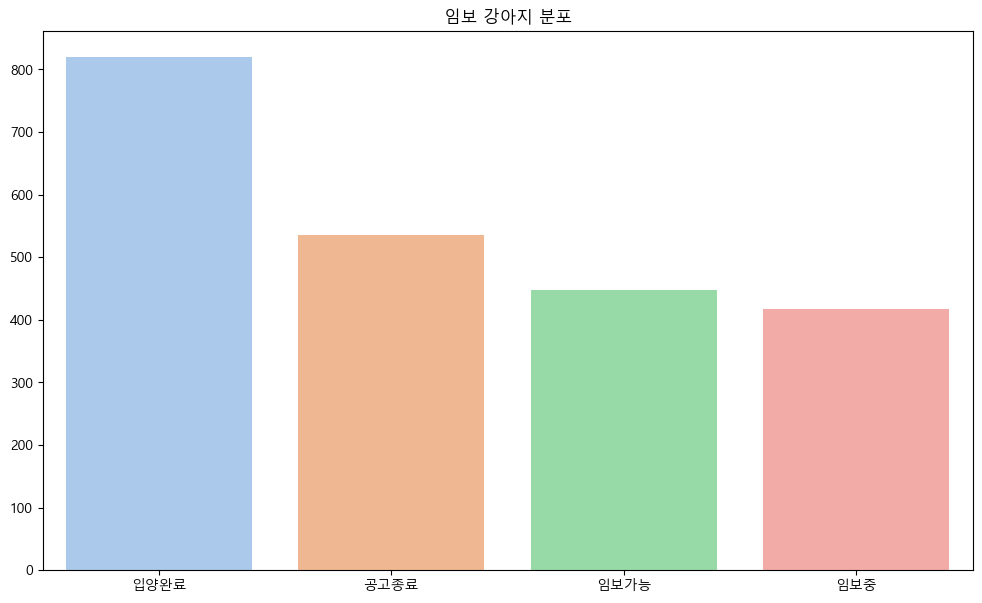

In [29]:
def classify_status(tag_list):
    if '공고종료' in tag_list:
        return '공고종료'
    elif '입양완료' in tag_list:
        return '입양완료'
    elif '임보중' in tag_list:
        return '임보중'
    else:
        return '임보가능'

dog_df['현재 상태'] = dog_df['tags'].apply(classify_status)

status_order = dog_df['현재 상태'].value_counts().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(12, 7))
sns.countplot(data=dog_df, x='현재 상태',order=status_order,palette='pastel')
plt.title('임보 강아지 분포')
plt.xlabel('')
plt.ylabel('')
plt.show()

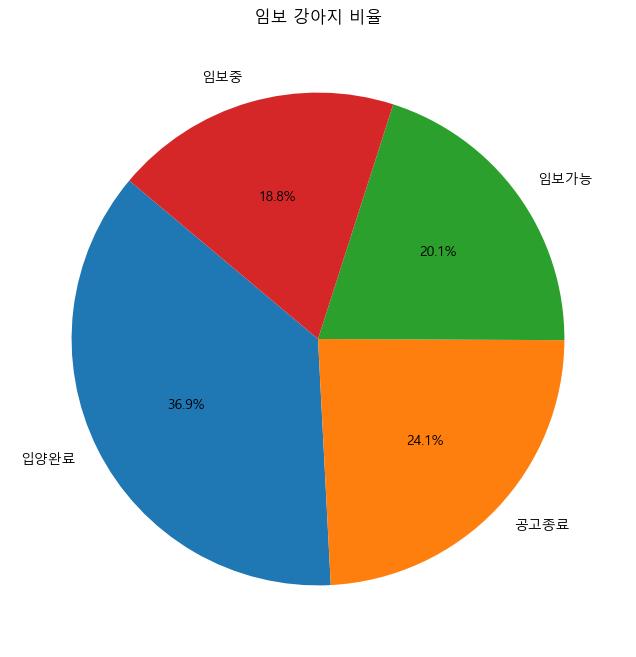

In [30]:
status_counts = dog_df['현재 상태'].value_counts()

labels = status_counts.index
sizes = status_counts.values

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('임보 강아지 비율')
plt.show()


### 기타 시각화

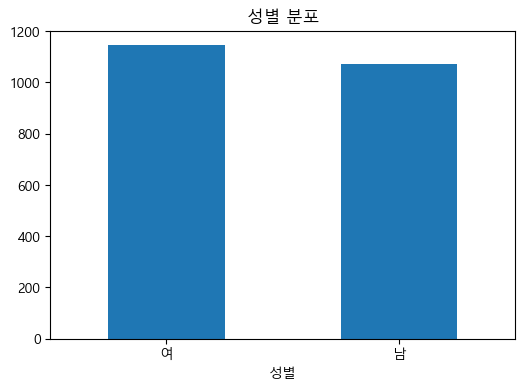

In [ ]:
# 성별 시각화 
gender_counts = filtered_df_gender['성별'].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.title('성별 분포')
plt.xlabel('성별')
plt.xticks(rotation=0)

plt.show()

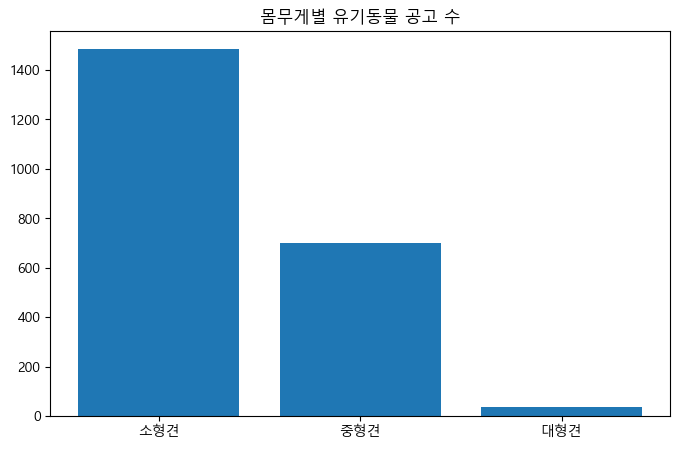

In [ ]:
# 몸무게 시각화 
def size(weight):
    if weight < 10:
        return '소형견'
    elif weight < 25:
        return '중형견'
    else:
        return '대형견'

filtered_df_weight['체급'] = filtered_df_weight['몸무게(kg)'].apply(size)

size_counts = filtered_df_weight['체급'].value_counts().reindex(['소형견', '중형견', '대형견'])

plt.figure(figsize=(8, 5))
plt.bar(size_counts.index, size_counts.values)
plt.title('몸무게별 유기동물 공고 수')

plt.show()
